# Regresión lógística binomial

## Acerca de los datos

[Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)

### Contexto

"Predecir comportamientos para retener clientes. Puedes analizar todos los datos relevantes de tus clientes y desarrollar programas específicos de fidelización de clientela."

### Contenido

Cada fila representa a un cliente, cada columna contiene atributos del cliente descritos en la columna Metadatos.

#### El conjunto de datos incluye información sobre:


- Clientes que abandonaron en el ultimo mes - la columna se llama **(Churn).**

- Servicios a los que cada cliente se ha suscrito - teléfono, múltiples líneas, internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico, y transmisión de TV y películas por Internet


- Información de la cuenta del cliente - cuánto tiempo han sido clientes, contrato, método de pago, factura sin papel, cargos mensuales y cargos totales.


- Información demográfica sobre los clientes - género, rango de edad, y si tienen parejas e hijos dependientes.

*Churn es un término de negocios para referirse a los clientes que deciden abandonar la compañía.*

*Ej: "Este mes el churn fue de 200 clientes" Significado: 200 clientes abandonaron la subscripción ese mes.*



## Carga de datos

In [2]:
# Importando librerias necesarias para analizar los datos
import pandas as pd
import numpy as np
# Graficas
import matplotlib.pyplot as plt
import seaborn as sns
# Escalamiento de datos
from sklearn.preprocessing import MinMaxScaler
# Separacion de datos
from sklearn.model_selection import train_test_split
# Modelo de regresion logistica
from sklearn.linear_model import LogisticRegression
# Verificando las metricas del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
# Balanceando los datos
from imblearn.combine import SMOTEENN
# Counter
from collections import Counter


In [3]:
# cargando los datos desde el csv
df = pd.read_csv("../data/Telco-Customer-Churn.csv")

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data pre-processing

In [5]:
# Informacion del DATAFRAME
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cambiar TOTALCHARGE de "object" a numero

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### Manejo de datos nulos

In [7]:
# Para ver la suma de todos los valores nulos en un dataframe
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Obtamos por eliminar esos 11 valores nulos de TotalCharges

In [8]:
df.dropna(subset=['TotalCharges'], inplace=True)


Eliminar el ID en el DATAFRAME, ya que no me suba y se usa para la compañia

In [9]:
df.drop('customerID', axis=1, inplace=True)

## Convertir a numérico variable objetivo

In [10]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
# Ver si se hizo los cambios
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

## Manejo de variables categóricas

In [12]:
# Volver numericas las variables categóricas
df_processing = pd.get_dummies(df, drop_first=True, dtype=int)

In [13]:
df_processing

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


## Analisis de correlación

In [14]:
# Resaltar valores con pandas
df_processing.corr(numeric_only=True).style.highlight_between(left=0.65, right=0.99, color='lightgreen')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,0.254923,-0.182519,-0.182519,-0.038576,-0.182519,0.066663,-0.182519,0.059514,-0.182519,-0.060577,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,0.005285,0.381912,0.163386,0.007877,-0.007877,0.332399,0.017930,-0.037529,-0.037529,0.328297,-0.037529,0.361138,-0.037529,0.361520,-0.037529,0.325288,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,-0.013779,0.097825,-0.112343,0.248033,-0.248033,0.490912,0.787195,-0.763191,-0.763191,0.296447,-0.763191,0.441529,-0.763191,0.482607,-0.763191,0.338301,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,0.000048,0.319072,0.064653,0.113008,-0.113008,0.469042,0.360769,-0.374878,-0.374878,0.412619,-0.374878,0.510100,-0.374878,0.522881,-0.374878,0.432868,-0.374878,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,-0.008545,-0.149982,-0.163128,0.011691,-0.011691,0.040033,0.307463,-0.227578,-0.227578,-0.171270,-0.227578,-0.082307,-0.227578,-0.066193,-0.227578,-0.164716,-0.227578,0.063254,-0.227578,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,-0.011189,0.004745,0.004745,-0.016328,0.004745,-0.013093,0.004745,-0.000807,0.004745,-0.008507,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,0.001235,-0.000286,-0.000286,0.143346,-0.000286,0.141849,-0.000286,0.153556,-0.000286,0.120206,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,-0.163128,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,-0.164101,0.138383,0.138383,0.080786,0.138383,0.023639,0.138383,0.013900,0.138383,0.063053,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,0.011691,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,0.290183,0.171817,0.171817,-0.091676,0.171817,-0.052133,0.171817,-0.070076,0.171817,-0.095138,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,-0.011691,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,-0.290183,-0.171817,-0.171817,0.091676,-0.171817,0.052133,-0.171817,0.070076,-0.171817,0.095138,-0.171817,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463


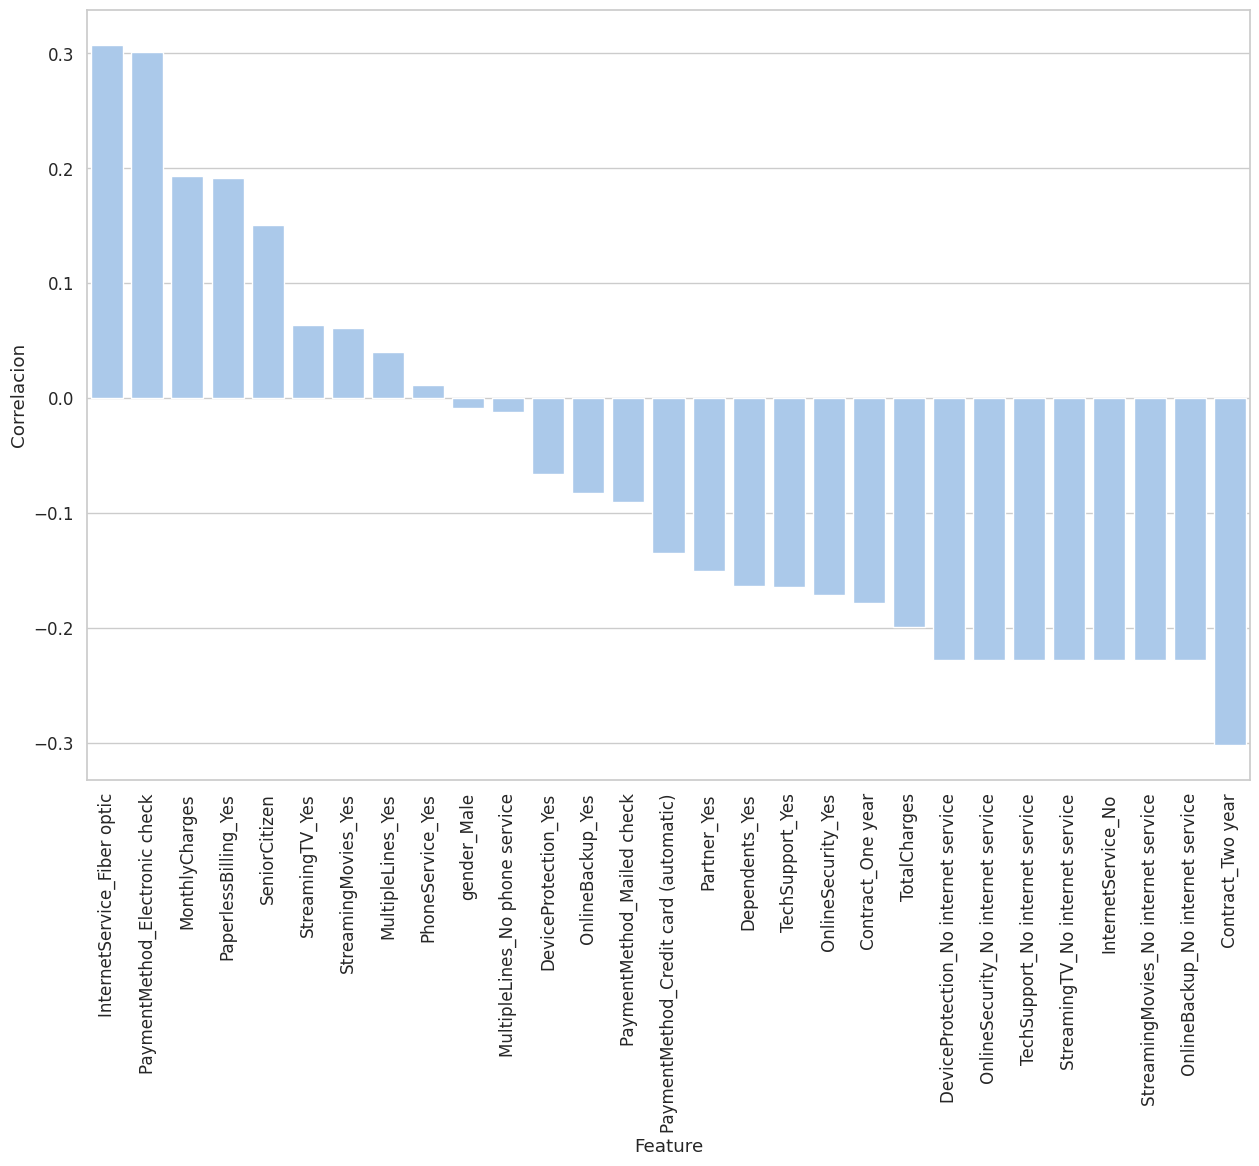

In [15]:

plt.figure(figsize=(15,10))
sns.set_theme(font_scale=1.1, style="whitegrid", palette="pastel", context='notebook')
sns.barplot(data=df_processing.corr()['Churn'].sort_values(ascending=False).reset_index()[1:-1], x='index', y='Churn')
plt.ylabel("Correlacion")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()

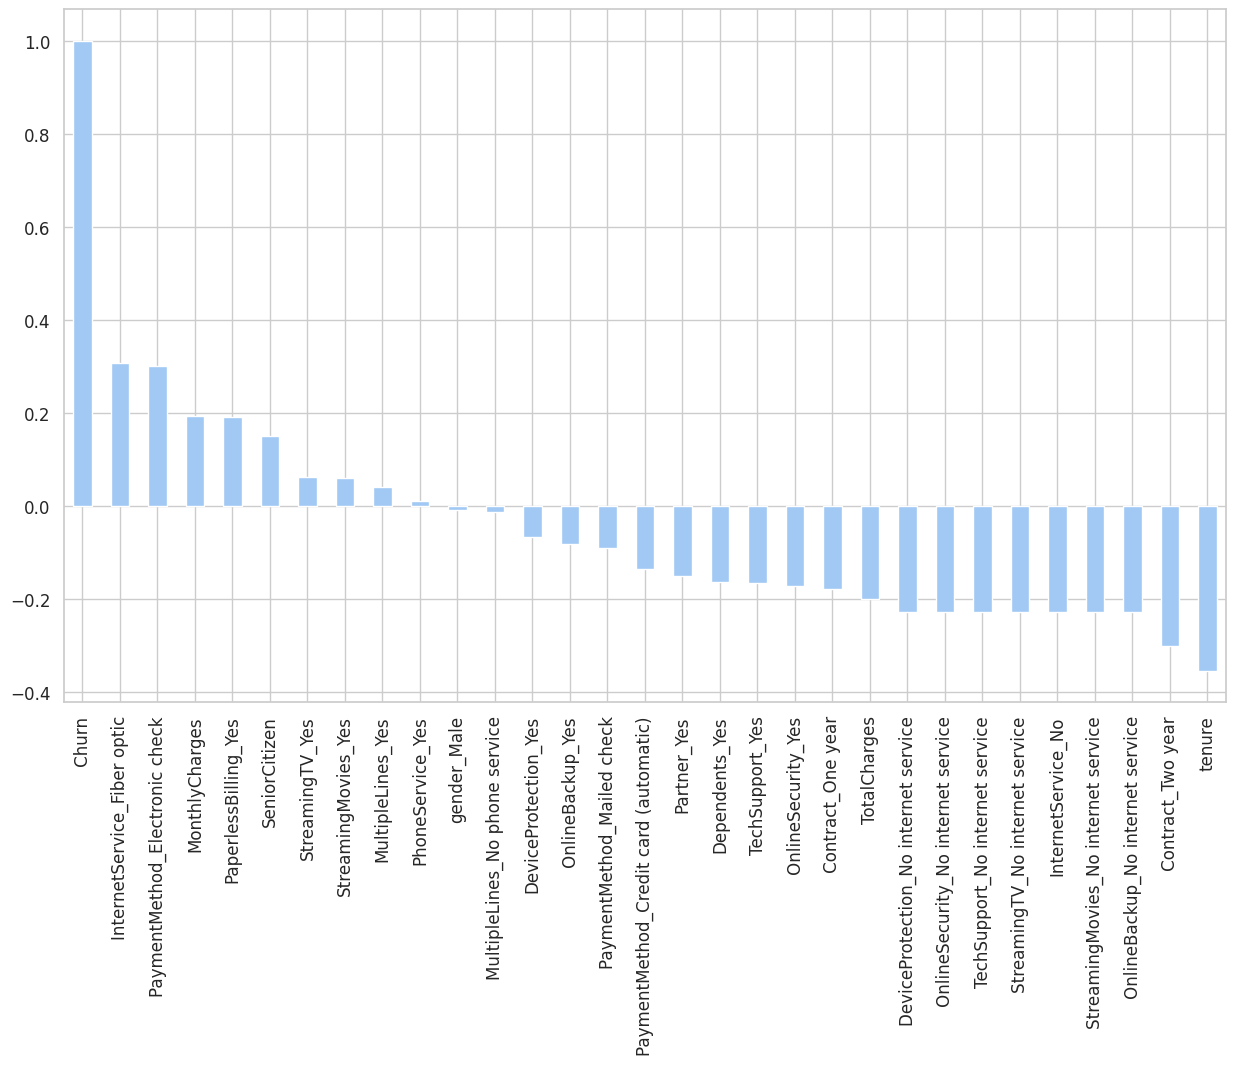

In [16]:
fig = plt.figure(figsize=(15,9))
df_processing.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

# Insight
La correlación más fuerte con la variable objetivo (Churn) es la duración del contrato (Contract). Los contratos a corto plazo tienen una correlación positiva con la variable Churn, lo que sugiere que los clientes con contratos a corto plazo son más propensos a darse de baja. Por otro lado, los contratos a largo plazo tienen una correlación negativa con Churn, lo que sugiere que los clientes con contratos a largo plazo son menos propensos a darse de baja.

Los clientes con servicios adicionales, como múltiples líneas telefónicas o servicios de streaming de TV y películas, tienen una correlación negativa con Churn, lo que sugiere que estos servicios pueden aumentar la satisfacción del cliente y reducir la probabilidad de darse de baja. Por otro lado, aquellos clientes que no cuentan con estos servicios presentaron una correlación positiva con la variable objetivo (Churn), lo que sugiere que estos clientes son más propensos a darse de baja.

Los clientes con facturación electrónica tienen una correlación negativa con Churn, lo que sugiere que esta opción puede hacer que sea más fácil para los clientes mantenerse al día con los pagos y reducir la probabilidad de darse de baja.


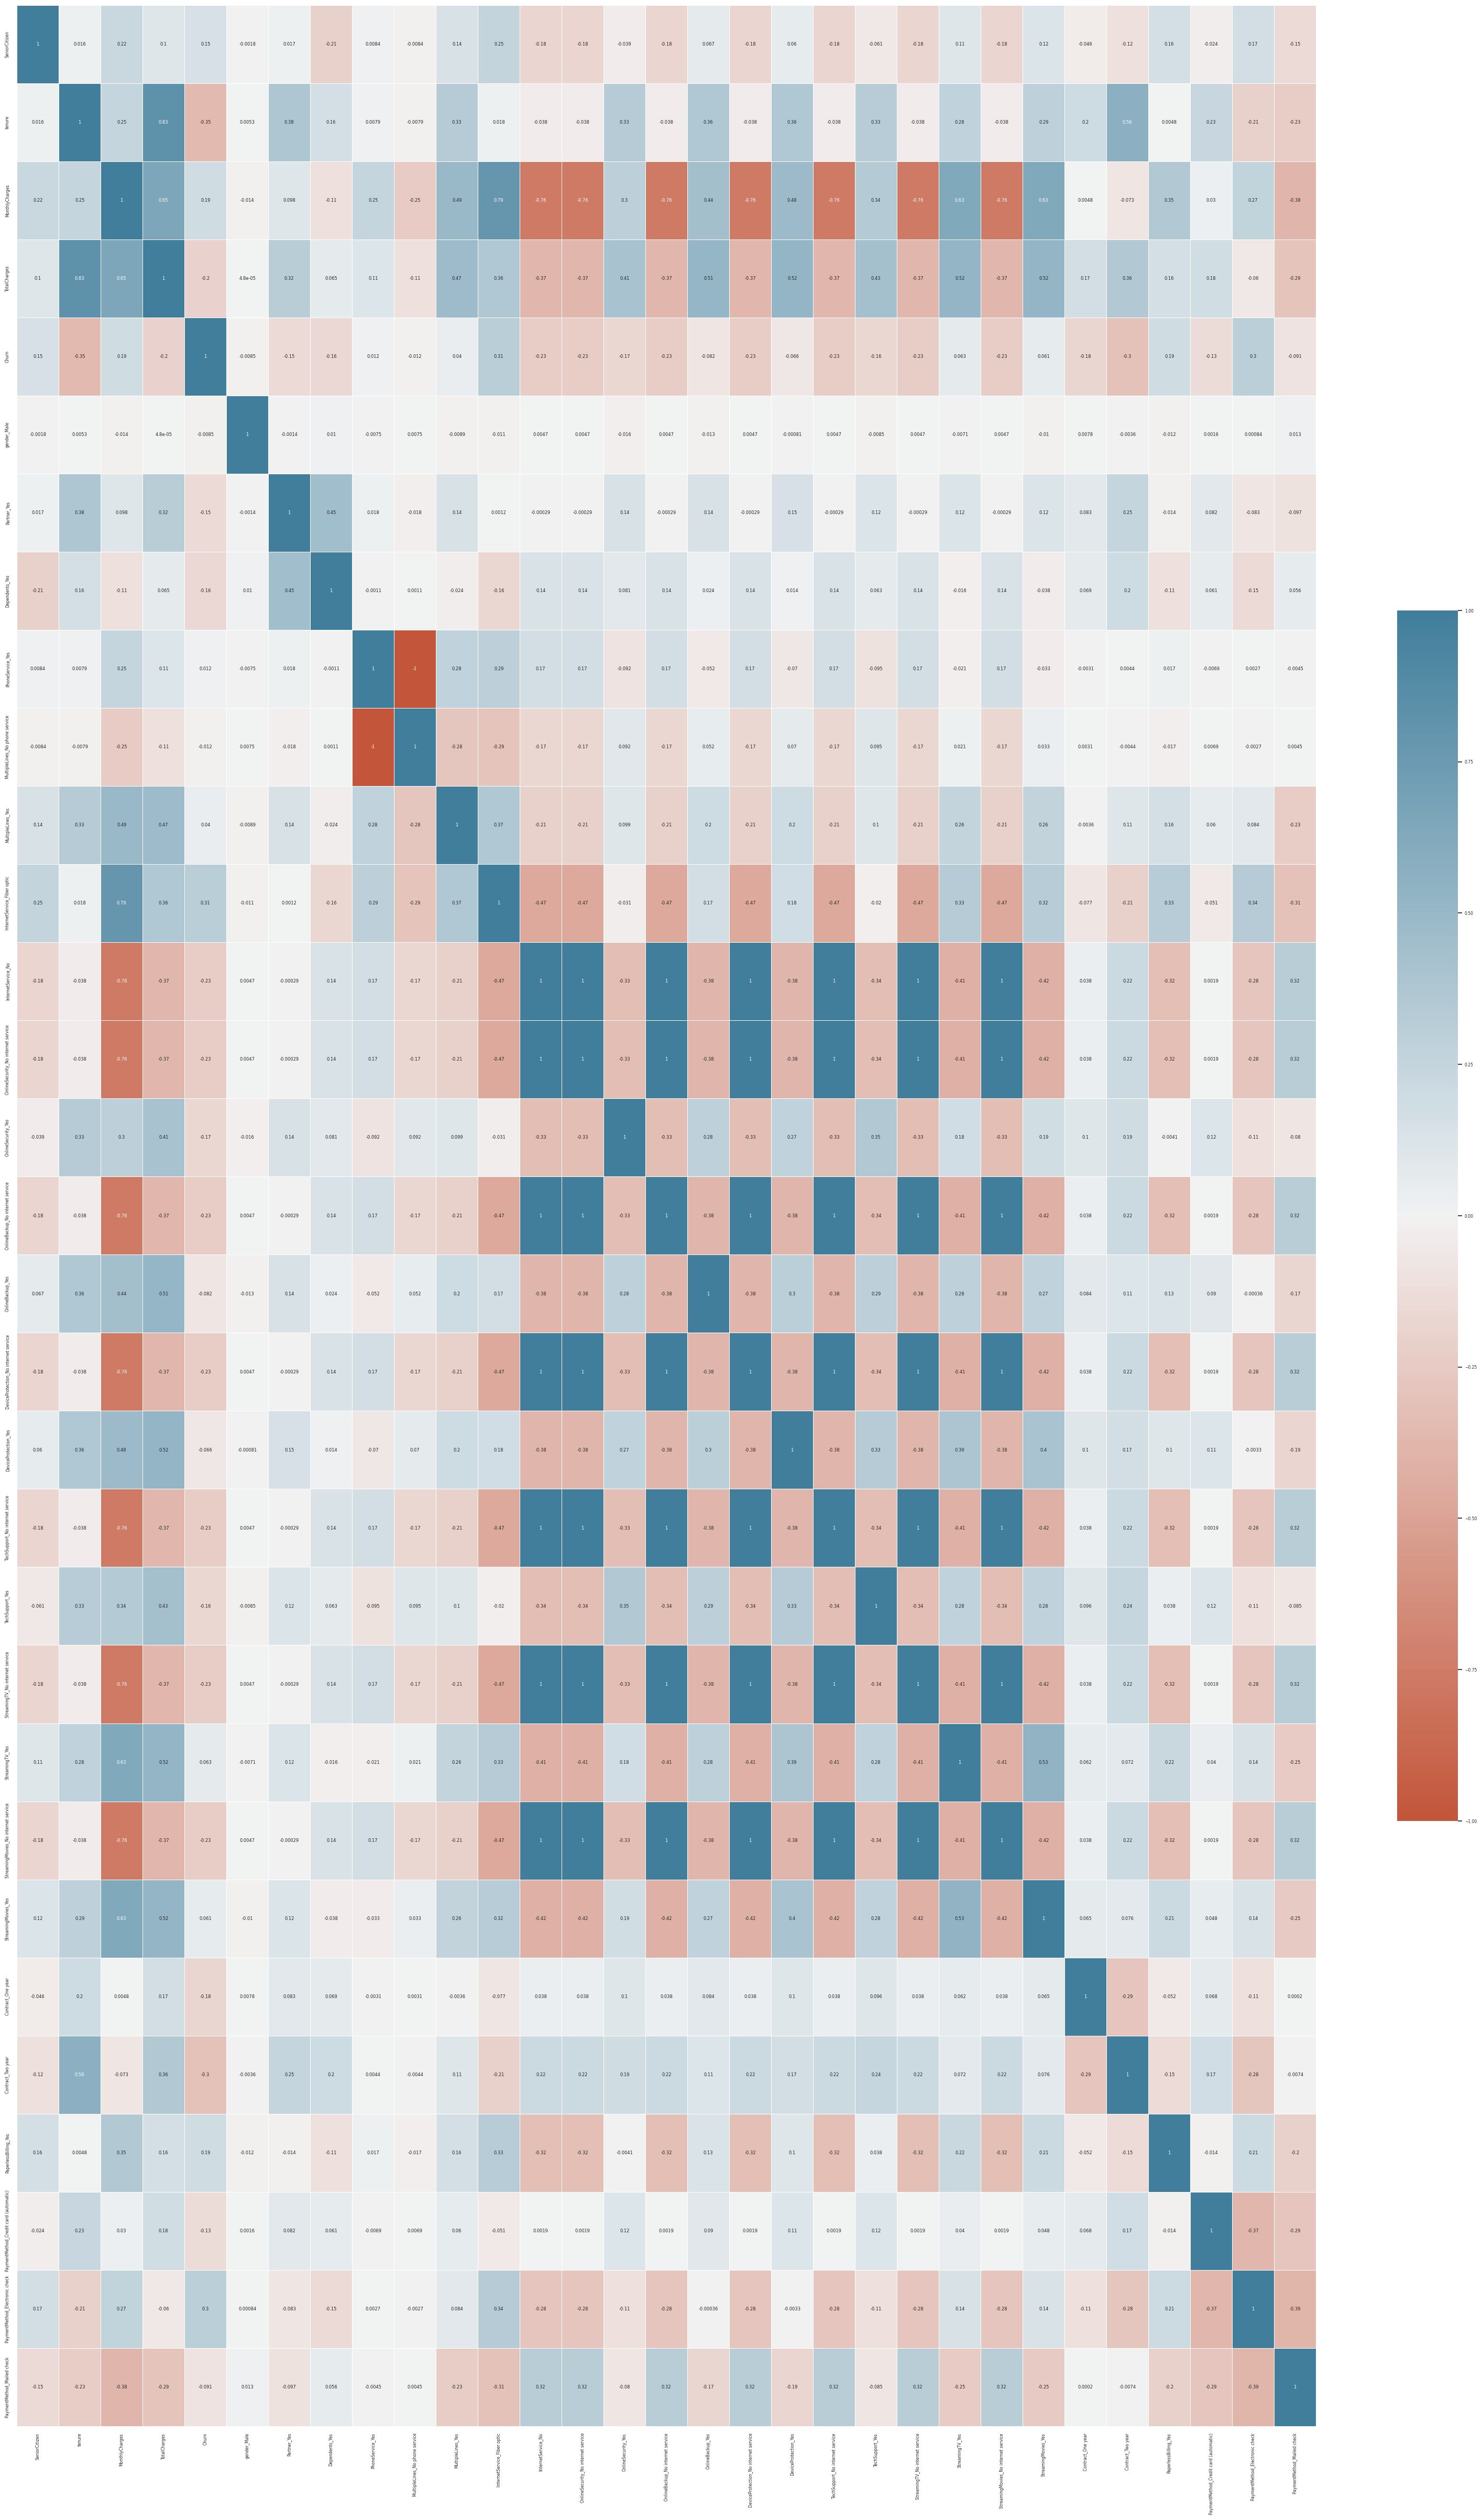

In [17]:
plt.figure(figsize=(40, 60))
sns.set_theme(font_scale=0.5, style="whitegrid", palette="pastel", context='notebook')
sns.heatmap(
    data=df_processing.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
);

## Escalabilidad de los datos

In [18]:
minmax_scaler = MinMaxScaler()
df_processing_scaled = minmax_scaler.fit_transform(df_processing)

In [19]:
# Esto es un tensor y no un dataFrame
# df_processing_scaled
# Convertir a DatFrame
df_processing_scaled = pd.DataFrame(df_processing_scaled)

In [20]:
# Perdi el nombre las columnas y tenemos que mandarlas de nuevo
df_processing_scaled.columns = df_processing.columns

In [21]:
df_processing_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Análisis exploratorio de datos

In [22]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


### Variables Categoricas

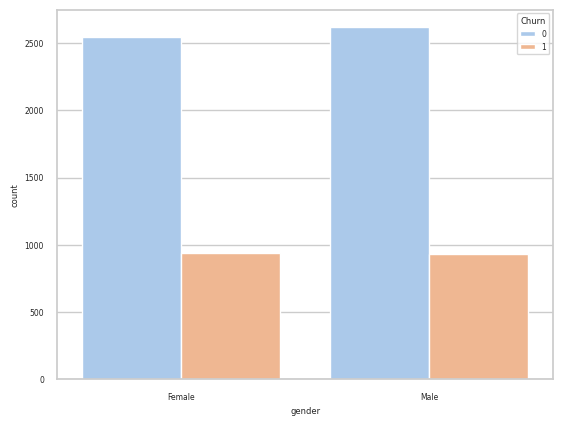

In [23]:
# Analisis exploratorio desde los datos normales
sns.countplot(
    data=df,
    x='gender',
    hue='Churn'
)
plt.show()

In [24]:
def plot_categorical(columns, ncols = 2):
    # Numero de graficas a realizar
    nplot = len(columns)
    nrows = (nplot // ncols) + 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,  figsize=(20, 30))
    for row in range(nrows):
        for col in range(ncols):
            title = columns[row + col]
            sns.countplot(data=df, x=title, hue='Churn', ax=axes[row, col])
            axes[row, col].set_title("COUNT " + title.upper())
            axes[row, col].set_xlabel(title)
            axes[row, col].set_ylabel("Count")
            axes[row, col].legend()
    fig.tight_layout()
    plt.show()

In [25]:
column_categorical = df.select_dtypes(include=['object']).columns
column_categorical

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

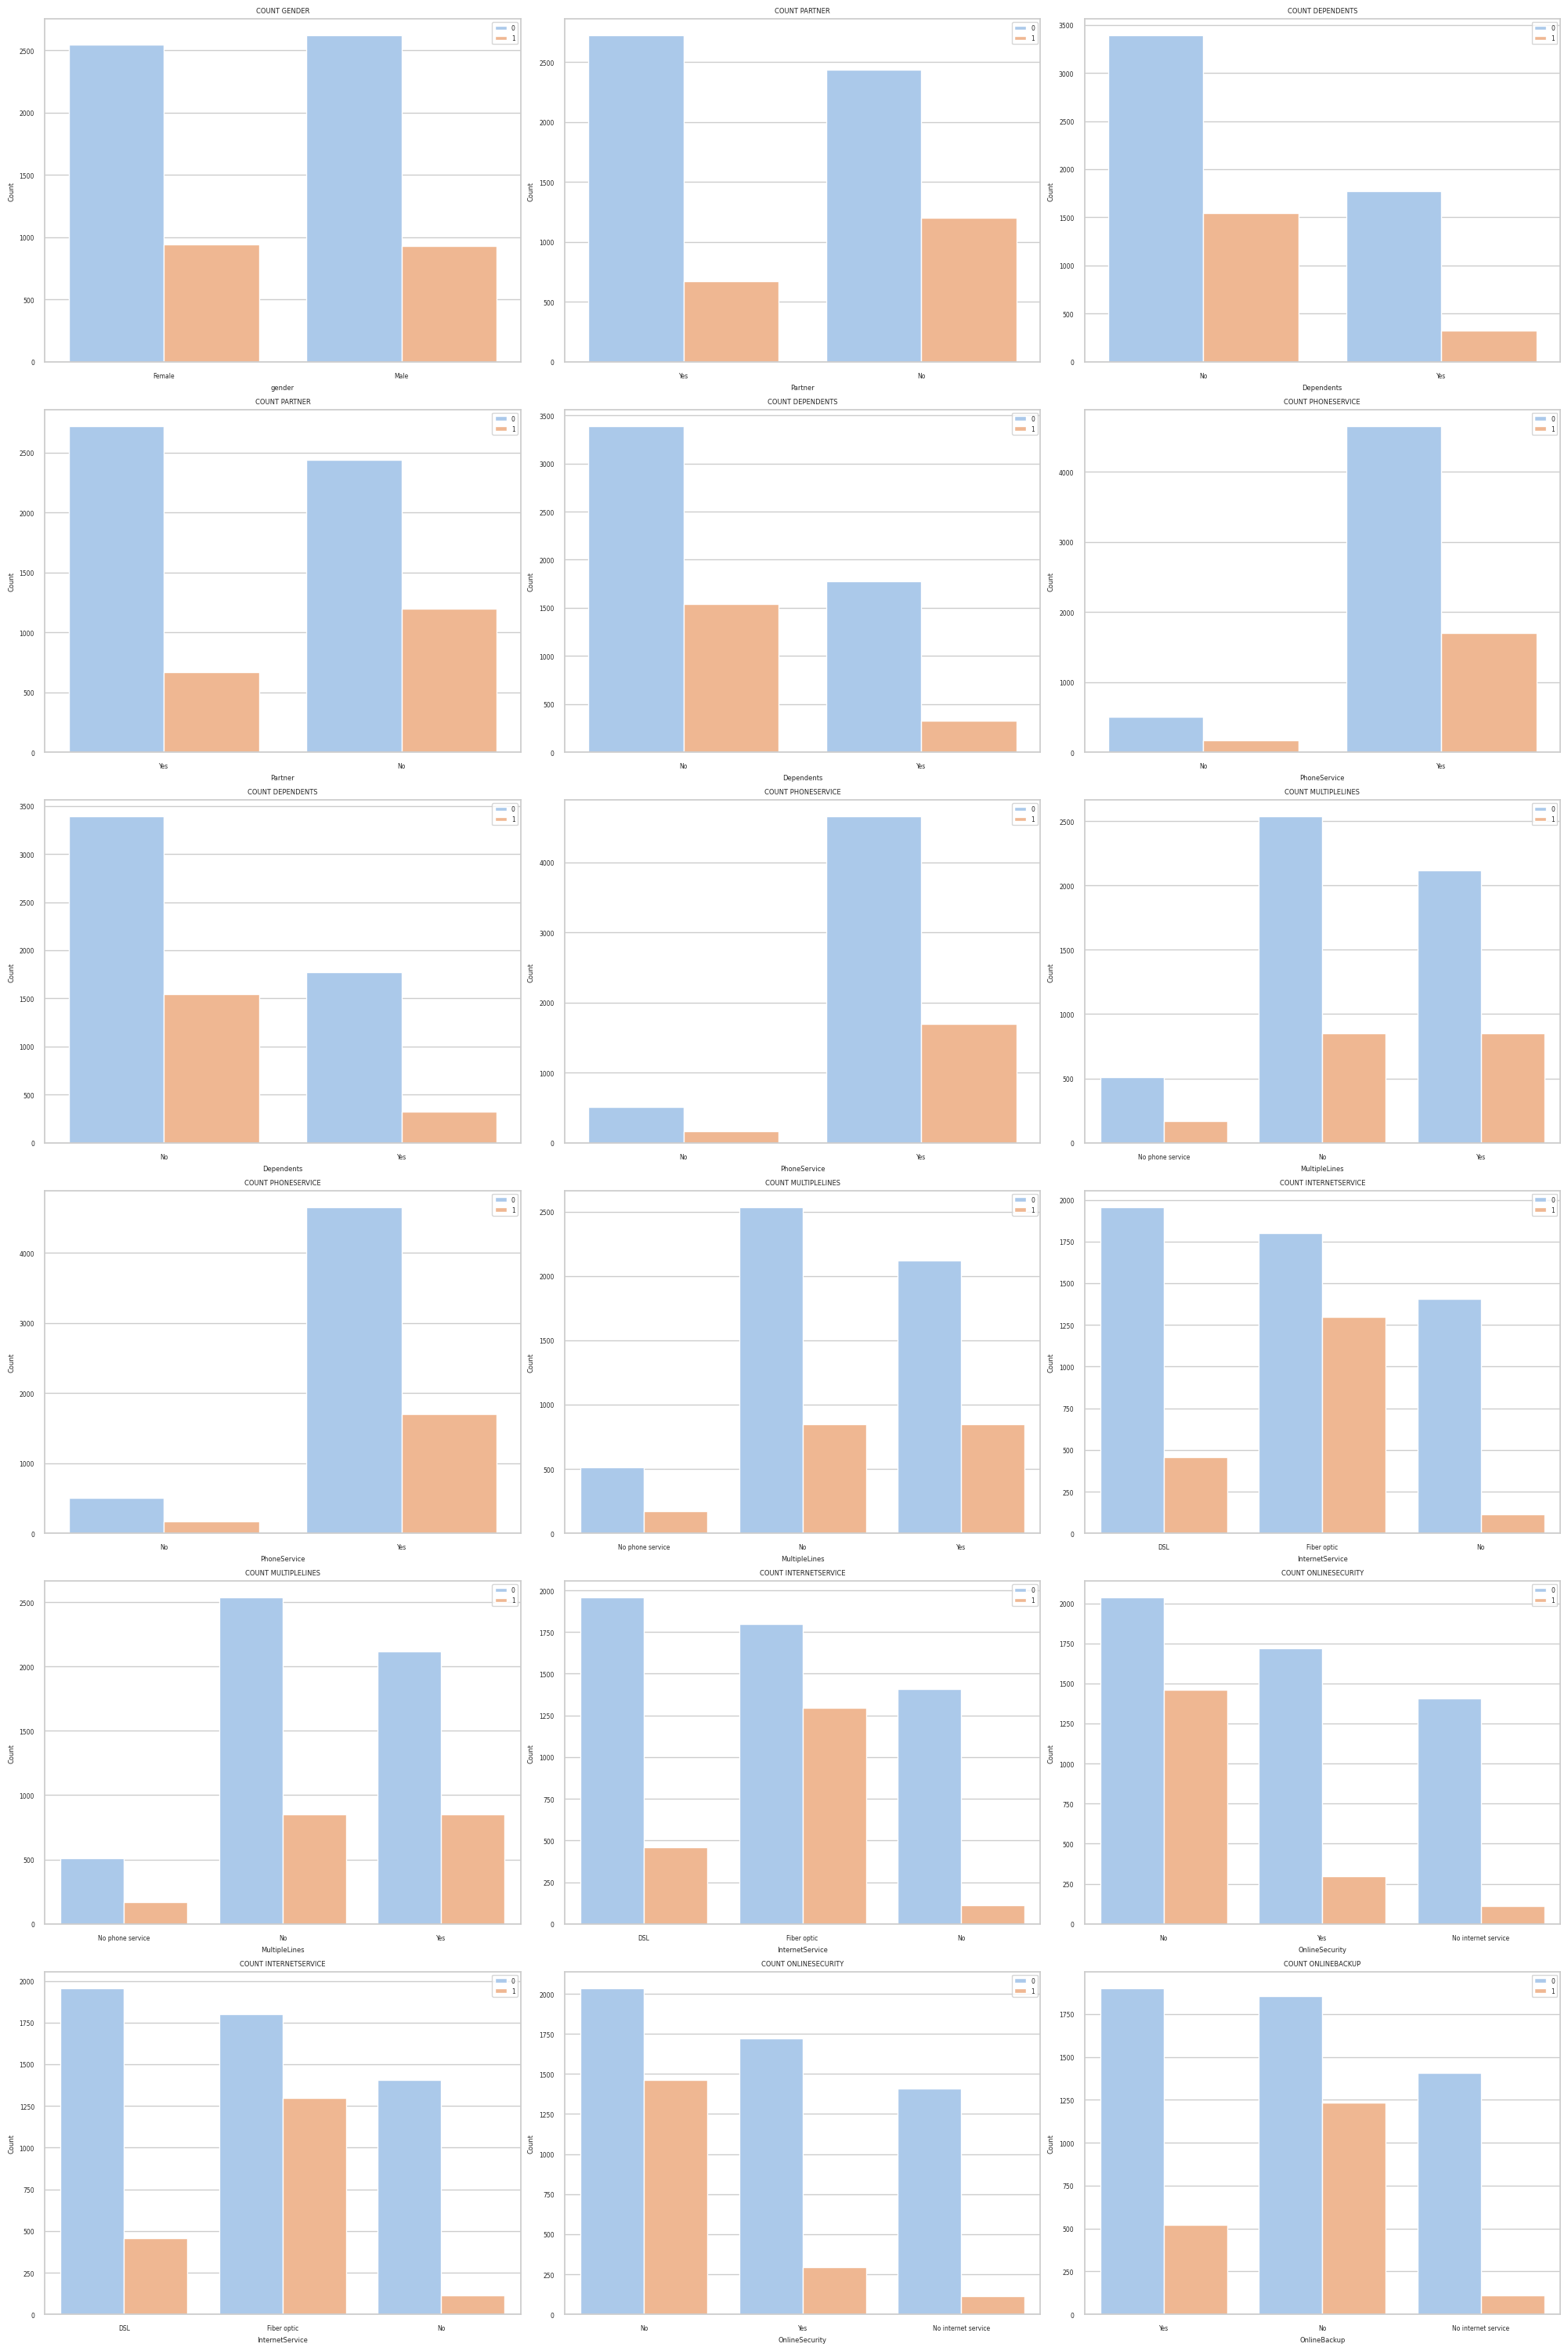

In [26]:
# Usar for para plotear
plot_categorical(column_categorical, 3)

## Insight

La variable "gender" no parece tener una correlación significativa con la tasa de churn.

- Los clientes con "Partner" (pareja) y "Dependents" (dependientes) tienen menos probabilidades de darse de baja.

- Los clientes que tienen "PhoneService" (servicio telefónico) y "MultipleLines" (múltiples líneas telefónicas) tienen menos probabilidades de darse de baja.
- Los clientes que tienen fibra optica en "InternetService" (servicio de internet) tienen una alta tasa de churn en comparacion de los que tienen DSL y no tienen.
- Los clientes que no tienen "OnlineSecurity" (seguridad en línea), "OnlineBackup" (respaldo en línea), "DeviceProtection" (protección de dispositivo) y "TechSupport" (soporte técnico) tienen una alta tasa de churn.
- Los clientes que utilizan servicios de "StreamingTV" (televisión por streaming) y "StreamingMovies" (películas por streaming) parecen tener una correlación positiva con la tasa de churn.
- Los clientes con contratos a corto plazo (mes a mes) tienen una alta tasa de churn en comparación con aquellos con contratos a largo plazo.
- Los clientes que utilizan "PaperlessBilling" (facturación sin papel) tienen una alta tasa de churn.
- Los clientes que utilizan "Electronic check" (cheques electrónicos) como método de pago tienen una alta tasa de churn en comparación con otros métodos de pago.

### Variables Numericas

<Figure size 1200x600 with 0 Axes>

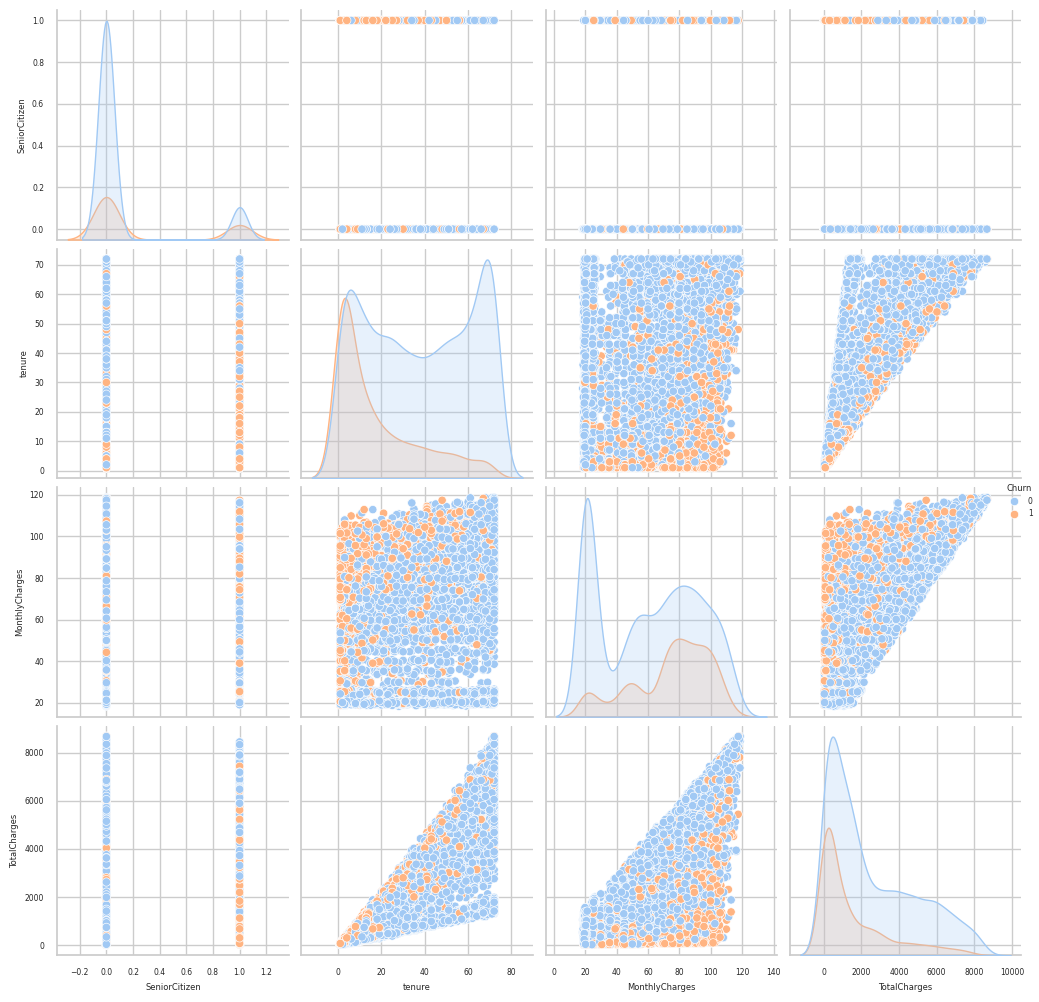

In [27]:
fig = plt.figure(figsize=(12, 6))
sns.pairplot(data=df, hue='Churn')
plt.tight_layout()
plt.show()

## Insight
- Se puede observar que la combinación de una factura elevada en un período corto de tiempo (por ejemplo, en el primer o segundo mes) parece estar fuertemente asociada con la cancelación de servicios (churn) por parte del cliente. Esto sugiere que los clientes son más sensibles a los precios y están dispuestos a cancelar sus servicios si sienten que están pagando demasiado en un corto período de tiempo.

## Entrenamiento del modelo de regresión logística binomial

In [28]:
X = df_processing_scaled.drop('Churn', axis=1)
y = df_processing_scaled['Churn'].values

In [29]:
# Separando los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X_train.shape

(4922, 30)

In [31]:
X_test.shape

(2110, 30)

### Entrenando el modelo

In [32]:
# Modelo
model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Metricas del modelo

In [33]:
prediction_test = model.predict(X_test)

print(accuracy_score(y_test, prediction_test))

0.795734597156398


## Evaluación del modelo

In [34]:
model.predict_proba(X_test)
# Probabilidad de 0 y 1

array([[0.9900733 , 0.0099267 ],
       [0.86260748, 0.13739252],
       [0.30246025, 0.69753975],
       ...,
       [0.99015604, 0.00984396],
       [0.70085651, 0.29914349],
       [0.82812473, 0.17187527]])

In [35]:
# Coeficientes
model.coef_
# Indican la importancia que tiene cada variable en el modelo

array([[ 0.22035058, -3.12507861, -0.10677561,  1.20430842, -0.0231496 ,
         0.1211656 , -0.25563979, -0.22952716,  0.21292584,  0.21033512,
         0.91161368, -0.11549255, -0.11549255, -0.38784332, -0.11549255,
        -0.07610719, -0.11549255, -0.02221961, -0.11549255, -0.35122839,
        -0.11549255,  0.258926  , -0.11549255,  0.26175833, -0.82099263,
        -1.37880107,  0.20788667, -0.15752054,  0.21943162, -0.07633099]])

In [36]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

Axes(0.125,0.11;0.775x0.77)


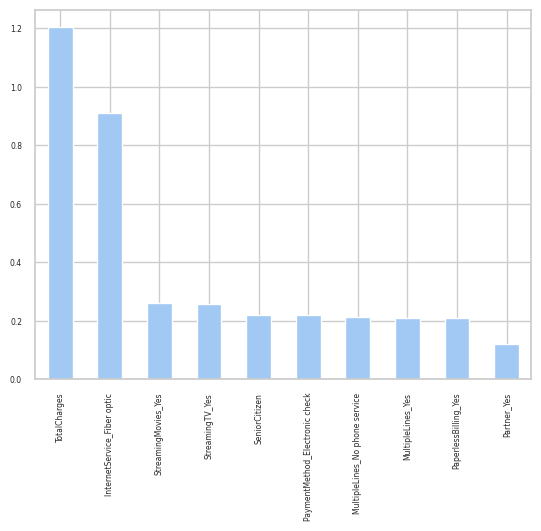

In [37]:
# Grafica para ver los pesos
wwights = pd.Series(model.coef_[0], index=X.columns.values)
print(wwights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


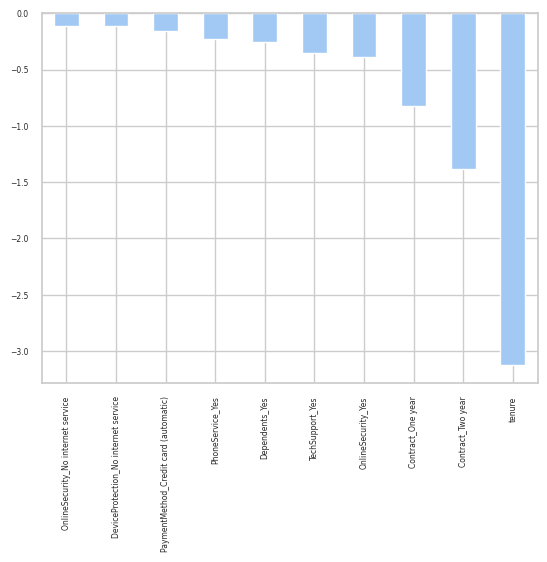

In [38]:
print(wwights.sort_values(ascending=False)[-10:].plot(kind='bar'))

### Matrix de confusion

<Figure size 1200x600 with 0 Axes>

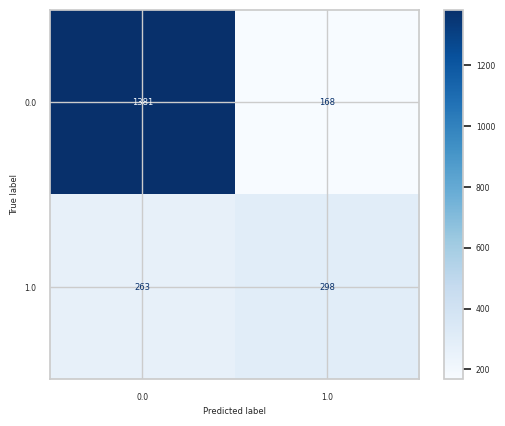

In [39]:

cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
# Hacer la visualizacion
fig = plt.figure(figsize=(12, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

Cuando se analiza la distribución de datos se observa que los valores NO representan el 73% de todos los datos lo cual hace que el balance sea muy desproporcionado





In [40]:
df['Churn'].value_counts(normalize=True) * 100

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

Luego de entrenar el modelo se obtiene un accuracy de 0.80 y unos valores de precision y recall muy bajos para la clase 1, sobretodo el F1 que tiene 0.58 algo que evidencia claramente que el modelo no esta correctamente entrenado

In [41]:
predicciones = model.predict(X_test).reshape(-1, 1)
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Para solucionarlo he usado la libería imbalanced-learn

In [42]:
# Balanceando los datos
sme = SMOTEENN(sampling_strategy=0.99, random_state=42)

X_res, y_res = sme.fit_resample(X, y)

# # Encontrnado como se encuentra distribuidos luego del balanceo
print("Resampled dataset shape %s" % Counter(y_res))


Resampled dataset shape Counter({1.0: 3394, 0.0: 2728})


- 1.0:   55.439399
- 0.0:   44.560601
- Name: count, dtype: float64

con estos nuevos X_res & y_res podemos entrenar el modelo (reemplazamos X_res & y_res en la función train_test_split y lo demás continua como se estaba haciendo.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [44]:
# Modelo
model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Al evaluar los resultados se observa claramente como han mejorado lo resutados pasando de un accuracy

In [45]:
predicciones = model.predict(X_test).reshape(-1, 1)
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       831
         1.0       0.92      0.93      0.92      1006

    accuracy                           0.92      1837
   macro avg       0.92      0.91      0.92      1837
weighted avg       0.92      0.92      0.92      1837



In [46]:
prediction_test = model.predict(X_test)

print(accuracy_score(y_test, prediction_test))

0.9161676646706587


In [47]:
model.predict_proba(X_test)
# Probabilidad de 0 y 1

array([[1.55966690e-01, 8.44033310e-01],
       [8.75465738e-03, 9.91245343e-01],
       [9.99522332e-01, 4.77667714e-04],
       ...,
       [1.67655820e-02, 9.83234418e-01],
       [4.70036678e-03, 9.95299633e-01],
       [4.19925951e-03, 9.95800740e-01]])

In [48]:
# Coeficientes
model.coef_
# Indican la importancia que tiene cada variable en el modelo

array([[ 0.2924246 , -3.41403294,  0.62437845,  0.42885386,  0.09241281,
        -0.30966088, -0.2583473 , -0.45820022,  0.45602137, -0.07045573,
         2.01372842, -0.30816397, -0.30816397, -0.97316461, -0.30816397,
        -0.35580459, -0.30816397, -0.10465392, -0.30816397, -1.04660986,
        -0.30816397,  0.64439106, -0.30816397,  0.67223414, -1.70360095,
        -3.27512514,  0.73068666,  0.00513144,  0.69544397,  0.13327503]])

In [49]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

Axes(0.125,0.11;0.775x0.77)


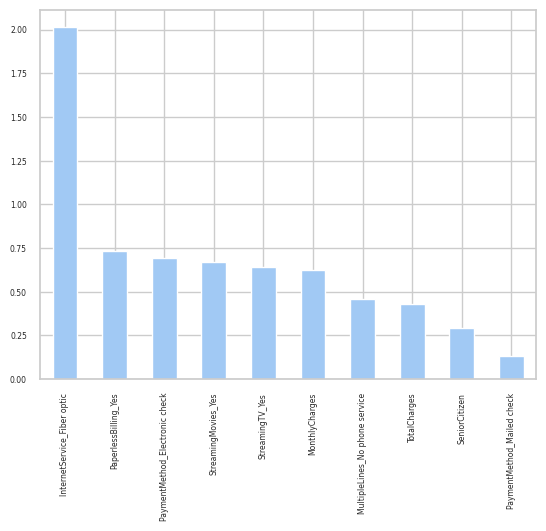

In [50]:
# Grafica para ver los pesos
wwights = pd.Series(model.coef_[0], index=X.columns.values)
print(wwights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


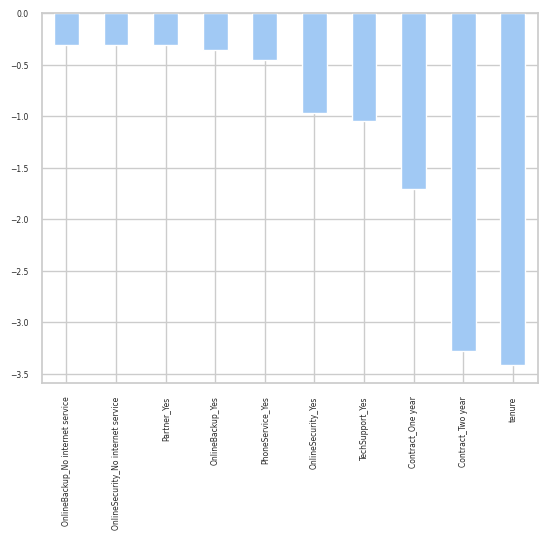

In [51]:
print(wwights.sort_values(ascending=False)[-10:].plot(kind='bar'))

<Figure size 1200x600 with 0 Axes>

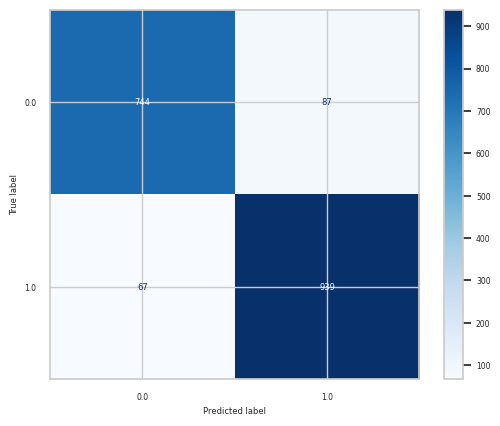

In [52]:
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
# Hacer la visualizacion
fig = plt.figure(figsize=(12, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

## Regularizacion

Esta técnica consiste en disminuir la complejidad de nuestro modelo a través de una penalización aplicada a sus variables más irrelevantes.

Para este ejemplo compararemos los resultados obtenidos con los distintos métodos de regularización usando la misma semilla y el mismo solver (saga)

### Tipos de regularizacion

#### L1 Lasso

Reduce la complejidad a través de eliminación de features que no aportan demasiado al modelo.
Penaliza a los features que aporta poca información volviéndolos cero, eliminado el ruido que producen en el modelo.

***C*** es un parámetro que define que tanto se penaliza a los features que menos aportan, debe ser siempre un valor positivo y mientras mas pequeño mayor sera la penalización

In [53]:
lasso = LogisticRegression(max_iter=10000, penalty='l1', solver='saga', C=0.5)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.9161676646706587

In [ ]:
# LogisticRegression(l1_ratio=0.91, max_iter=100000, penalty='elasticnet',
#                    solver='saga') 

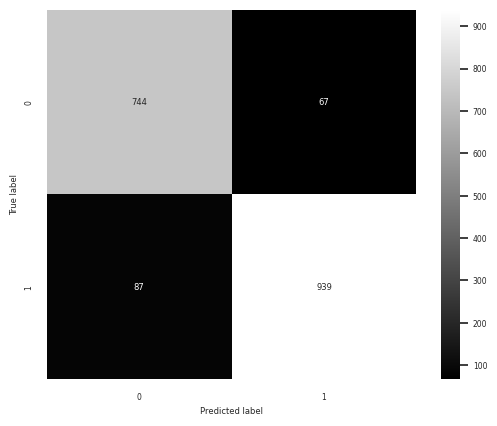

In [56]:

cm = confusion_matrix(lasso.predict(X_test), y_test)

sns.heatmap(cm, annot=True, fmt="d", cmap="gray", square=True)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

<Axes: >

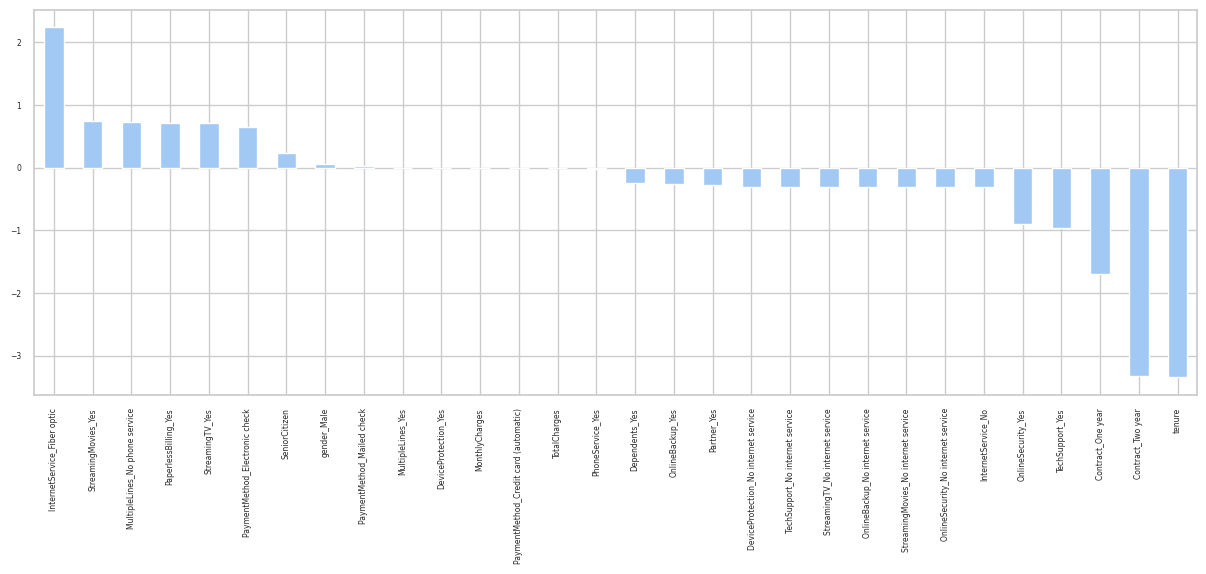

In [57]:
weights = pd.Series(lasso.coef_[0], index=X.columns.values).sort_values(ascending=False)

fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar')

Podemos ver cuales de nuestros parámetros se convirtieron a 0:

In [58]:
weights[weights == 0]

MultipleLines_Yes                        0.0
DeviceProtection_Yes                     0.0
MonthlyCharges                           0.0
PaymentMethod_Credit card (automatic)    0.0
TotalCharges                             0.0
dtype: float64

#### L2 Ridge

Reduce la complejidad disminuyendo el impacto de ciertos features a nuestro modelo.
Penaliza los features poco relevantes, pero no los vuelve cero. Solamente limita la información que aportan a nuestro modelo.

In [59]:
ridge = LogisticRegression(max_iter=10_000, penalty='l2', solver='saga', C=0.5)

ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.9167120304844856

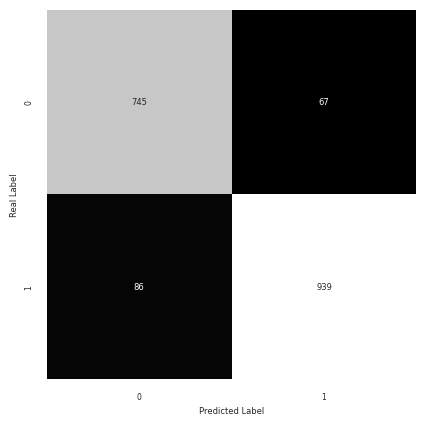

In [60]:
cm=confusion_matrix(ridge.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label');

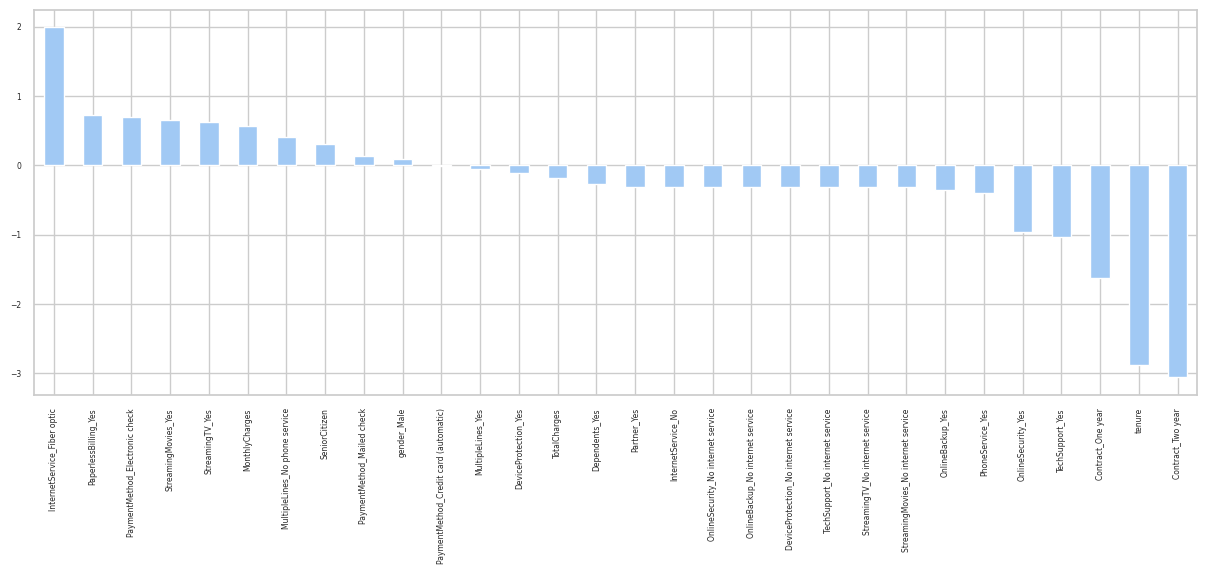

In [61]:
weights = pd.Series(ridge.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

Ridge no convierte a los features que aportan poco en 0

## Lasso vs Ridge

1. No hay un campeón definitivo para todos los problemas.
2. Si hay pocos features que se relacionen directamente con la variable a predecir: Probar Lasso.
3. Si hay varios features relacionados con la variable a predecir: Probar Ridge.
